# Building and executing code

* As we get deeper into the woods you will probably start wonder:
  * Why are there different compilers, and which should I use?
  * Is there anything specific I should know about the compilers?
  


# Compilers

* Yes, there are many different compilers. Main ones are:
    * GCC (Linux, OSX)
    * Clang (Linux, OSX, Windows)
    * MSVC (Windows)
    
* In general you can use either of these. However, if you do extremely performance sensitive stuff you may want to test different compilers on the same code.
* Their optimizers are different!

# Compilers

Interesting talk on the peformance differences between compilers and by using different compiler options:

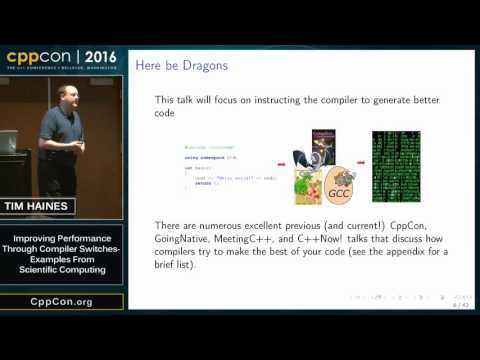

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('w5Z4JlMJ1VQ')

# Compilers

*From:* [here](https://youtu.be/w5Z4JlMJ1VQ?t=9m26s)

Switches come in essentially three variants (made up by Time Haines)
1. Compile-time static analysis
  1.1. `-Wall` and friends
2. Profiling and analysis
  2.1 PGO (gprof/gcov), -fsanitizer=X
3. Code generation
  3.1 `-Ox`, `-march`, `-ffast-math`
  3.2 Also LTO (or whole program optimization).
  

# Build systems

* We could manually invoke the compiler on all our source files.
  * However it would be quite tedious to maintain.
  * Typically we only need to recompile the source files that changed.
 
* Build systems manages building your library/executable for you.
* Many many different options exist:
  * make, cmake, meson, build2, waf, ninja, scons, ...    

# Build systems

Example (https://waf.io):

# Build systems

Create the `example_waf` directory:

In [3]:
! mkdir -p example_waf

# Build systems

Write our C++ program:

In [13]:
%%file example_waf/main.cpp
#include <iostream>
int main()
{
    std::cout << "Hello c++\n";
    return 0;
}


Overwriting example_waf/main.cpp


# Build systems

Write the `wscript` file:

In [6]:
%%file example_waf/wscript

def options(opt):
    opt.load('compiler_cxx')
def configure(cnf):
    cnf.load('compiler_cxx')
def build(bld):
    bld(features='cxx cxxprogram', source='main.cpp', target='app')


Writing example_waf/wscript


# Build systems

Download the `waf` binary:

In [9]:
! wget https://waf.io/waf-2.0.2 -O ./example_waf/waf

--2017-11-08 00:03:41--  https://waf.io/waf-2.0.2
Resolving waf.io (waf.io)... 83.226.177.123
Connecting to waf.io (waf.io)|83.226.177.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102291 (100K) [application/octet-stream]
Saving to: ‘./example_waf/waf’

./example_waf/waf   100%[===================>]  99.89K  --.-KB/s    in 0.03s   

2017-11-08 00:03:41 (2.79 MB/s) - ‘./example_waf/waf’ saved [102291/102291]



# Build systems

Change directory and run `python waf configure`. 

In [11]:
! cd example_waf; python waf configure

Setting top to                           : /home/mvp/dev/cpp-intro-2017/lecture_1/example_waf 
Setting out to                           : /home/mvp/dev/cpp-intro-2017/lecture_1/example_waf/build 
Checking for 'g++' (C++ compiler)        : /usr/bin/g++ 
'configure' finished successfully (0.066s)


# Build systems

Change directory and run `python waf build`:

In [14]:
! cd example_waf; python waf build

Waf: Entering directory `/home/mvp/dev/cpp-intro-2017/lecture_1/example_waf/build'
[1/2] Compiling main.cpp
[2/2] Linking build/app
Waf: Leaving directory `/home/mvp/dev/cpp-intro-2017/lecture_1/example_waf/build'
'build' finished successfully (0.282s)


# Build systems

Run the built application:

In [15]:
! ./example_waf/build/app

Hello c++
